# Homework 2


#### 1. 한 호텔에서 ```고객의 20%는 삼성카드```로 결제를 한다. 무작위로 추출된 ```10명의``` 고객 중 아래의 확률을 구하시오.<br><br>

### A. 삼성카드로 결제하는 사람이 ```한 명도 없을 확률은```? <br><br>

### 이항분포의 확률질량 함수 관련된 문제!

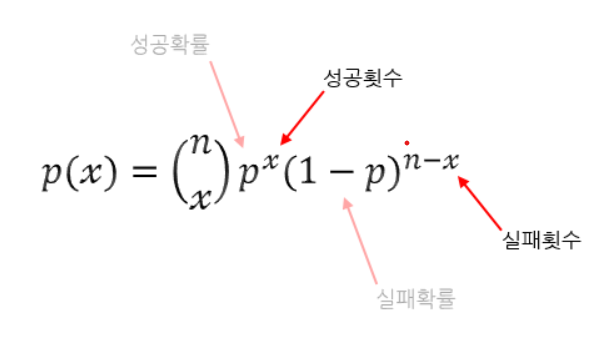

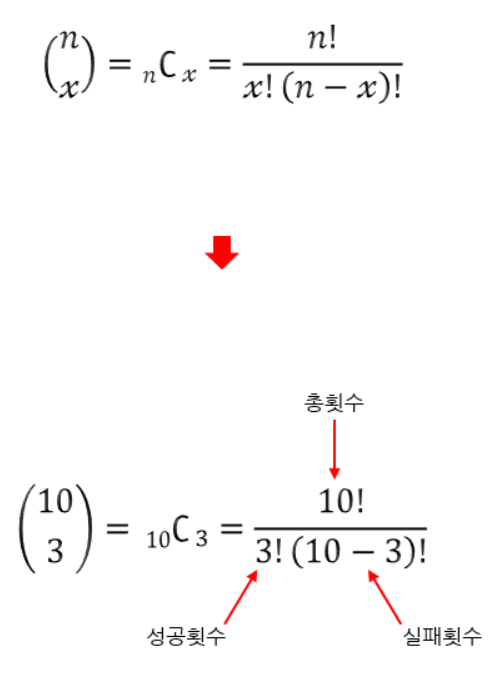

* 시행: 고객 10명을 선택하는 것
* 성공: A카드로 결제하는 고객이 0명인 것
* 실패: A카드로 결제하지 않는 고객인 것
* 확률: 각 고객이 A카드로 결제할 확률은 0.2로 주어졌으며, 각 시행은 서로 독립적인 베르누이 시행

#### 즉 x, n, p, k는
* x: 성공한 사건의 횟수 (여기서는 삼성카드로 ```결제하는 고객의 수```)
* n: 시행 횟수 (여기서는 ```10명의 고객을 추출하는 횟수```)
* p: 단일 시행에서 성공할 확률 (여기서는 고객 중에서 ```삼성카드로 결제하는 비율```, 즉 0.2)
* k: 성공해야 하는 목표 횟수 (여기서는 적어도 한 명의 ```고객이 삼성카드로 결제하지 않아야 하므로, k=0```)

> P(X=k) = ```(n choose k) * p^k * (1-p)^(n-k)``` 

In [12]:
import math

def binomial_pmf(n, k, p): # n = 시행횟수(10), p = 성공확률(결제확률(0.2), k = 성공횟수(결제한 횟수) (0)
    
    # X ~ B(10, 0.2)
    pmf = math.comb(n, k) * p**k * (1-p)**(n-k)  # 이항분포 공식
    return pmf

n = 10
k = 0
p = 0.2

pmf = binomial_pmf(n, k, p)

print("삼성카드로 결제하는 사람이 한 명도 없은 확률은 {:.2%}입니다.".format(pmf))  # 0.10737418240000005

삼성카드로 결제하는 사람이 한 명도 없은 확률은 10.74%입니다.


In [2]:
# x : 10명의 고객 중 삼성카드로 결제하는 사람의 수 ~ bin(10, 0.2)

# p(x= 0)
from scipy.stats import binom
binom.pmf(0, 10, 0.2)

0.10737418240000006

#### B. 삼성카드 고객이 적어도 2명일 확률은?<br><br>

> 확률 변수가 ```이산형이면 pmf``` 를 ```연속형이면 cmf```를 사용

In [7]:
# 이항 분포의 확률 질량 함수를 이용하여 P(X>=2)를 계산

import scipy.stats as stats

n = 10
p = 0.2
prob = 1 - stats.binom.cdf(1, n, p)

print("삼성카드 고객이 적어도 2명일 확률은 {:.2%}입니다.".format(prob))


삼성카드 고객이 적어도 2명일 확률은 62.42%입니다.


In [3]:
# p(x=2) + p(x=3)+ ....p(x=10) = p(>=2)
# cdf는 x가 작거나 같을 확률
1 - binom.cdf(1, 10, 0.2) 

0.6241903615999997

### 비슷한 예제

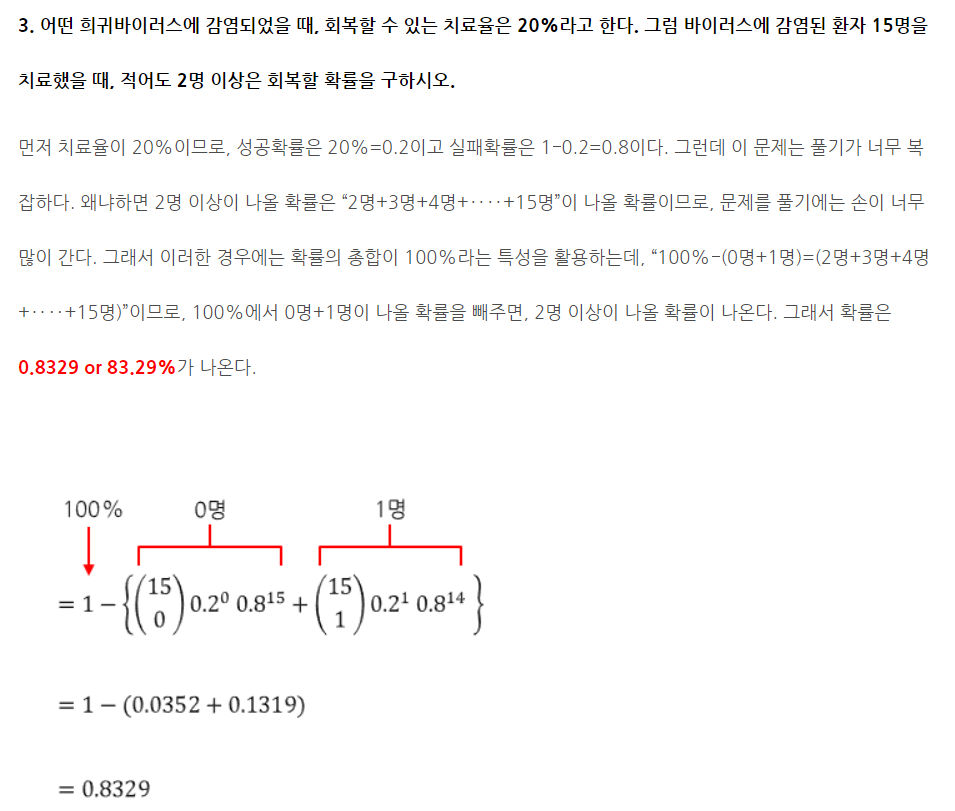

#### C. 삼성카드 고객이 3명 미만일 확률은?<br><br>

In [1]:
# x < 3, 3명일 미만 확률
from scipy.stats import binom

n = 10
p = 0.2
prob = binom.cdf(2, n, p)

print("삼성카드 고객이 3명 미만일 확률은 {:.2%}입니다.".format(prob))


삼성카드 고객이 3명 미만일 확률은 67.78%입니다.


In [4]:
# p(x<3) = p(x<=2)

binom.cdf(2, 10, 0.2)

0.6777995263999999

#### 비슷한 예제

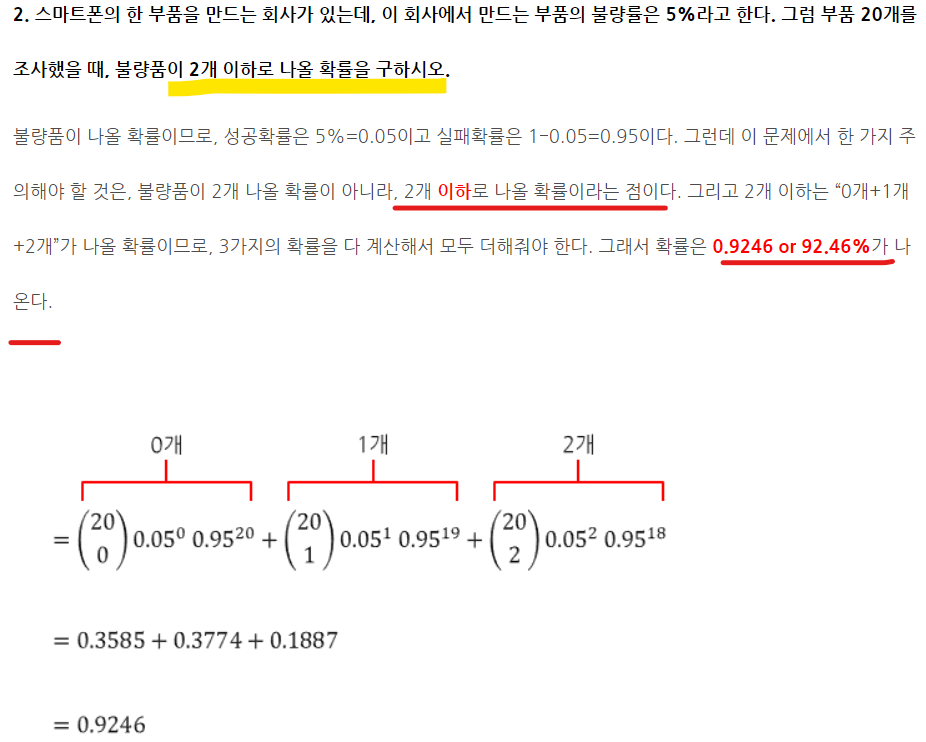

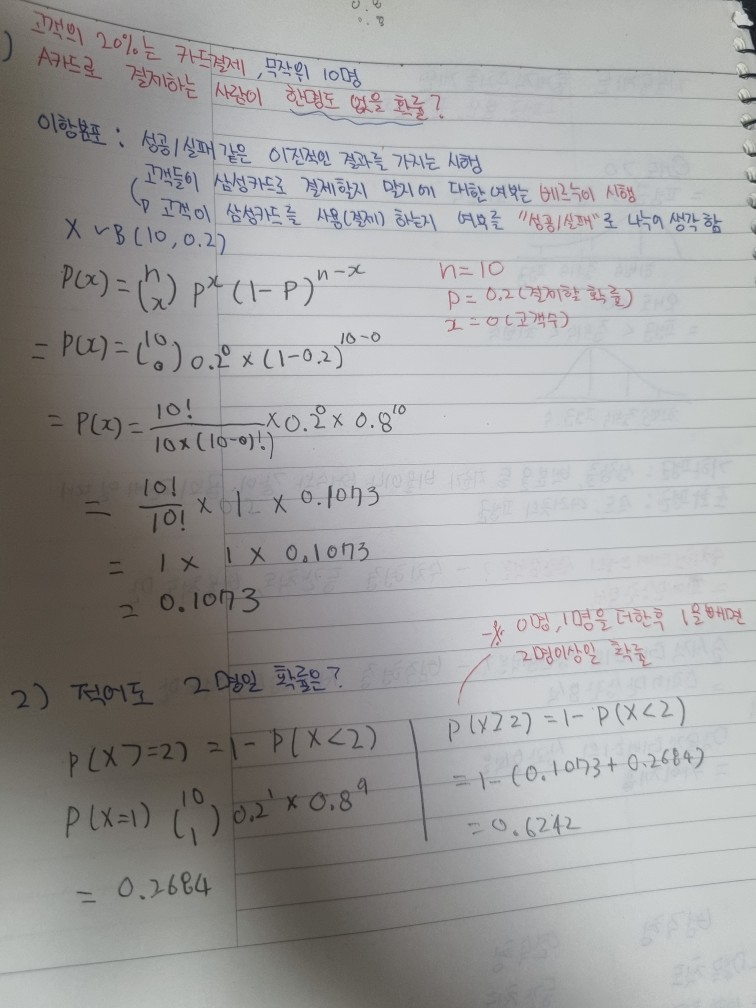

#### D. 삼성카드로 결제하는 고객의 수의 평균과 표준편차는?

In [6]:
import numpy as np

n = 10
p = 0.2

mean = n * p                    # 평균
std = np.sqrt(n * p * (1 - p))  # 표준편차

print("평균: ", mean)
print("표준편차: ", std)


평균:  2.0
표준편차:  1.2649110640673518


In [8]:
n = 10
p = 0.2

import numpy as np
np.sqrt(n * p(1-p))

TypeError: 'float' object is not callable

#### 2.	1981년에 조지프 슐리츠 양조회사는 쇠락해가는 브랜드를 되살리기 위해 170만 달러를 들여 과감한 마케팅 행사를 열었다. NFL 수퍼볼 하프타임에 자사의 맥주와 주요 경쟁사인 미켈롭 맥주의 맛을 겨루는 블라인드 테스트를 생방송으로 내보냈다. 미켈롭 등 경쟁 브랜드의 맥주를 즐겨마시는 소비자 100명을 대상으로 그들이 좋아하는 맥주와 슐리츠 맥주를 두고 블라인드 테스트가 진행됬다. 소비자가 슐리츠를 선택할 확률이 50%로 동일하고 서로 독립적이라고 가정하자. (슐리츠가 속한 제품군에 있는 맥주들은 대부분 맛이 비슷하므로 일반인들은 구분하지 못한다는 가정)

<img src="http://www.beerforum.co.kr/files/attach/images/1554/847/059/754fbaa1b034753f55bb961ca06d97ad.jpg" width=300>
<img src="http://dc.koreatimes.com/photos/LosAngeles/20031004/mr.jpg" width=300>

#### A.	만약 100명의 테스트 참가자 중에서 적어도 40%가 슐리츠를 고르면 슐리츠 사가 만족했을 거라고 가정해보자. (미켈롭을 좋아하는 소비자의 40%가 슐리츠를 선택했다니!!) 슐리츠 사가 만족할 확률은? 

##### 소비자 1명이 슐리츠 맥주를 선택할 확률 p는 0.5

* n = 100 (100명)
* p = 0.5 (소비자가 선택 확률 50%)
* P(X ≥ 40)을 계산


> P(X >= 40) = 1 - P(X < 40)

In [6]:
from scipy.stats import binom

n = 100  # 시행 횟수
p = 0.5  # 슐리츠를 선택할 확률

# 적어도 40%가 슐리츠를 고를 확률 구하기
p_satisfied = 1 - binom.cdf(n*0.4 - 1, n, p)

print("슐리츠 사가 만족할 확률:  {:.2%}입니다.".format(p_satisfied))


슐리츠 사가 만족할 확률:  98.24%입니다.


In [11]:
# x = 100명 중 슐리츠를 선택하는 사람의 수 ~ bin
# p(x >= 40) = 1 -p(x<=39)
n = 100
p = 0.5

p_satisfied = 1 - binom.cdf(n*0.4 - 1, n, p)
p_satisfied


0.9823998998911476

#### B.	만약 테스트 참가자가 500명이라면 슐리츠 사가 만족할 확률은?


In [12]:
# X: (슐리츠를 선택한 참가자의 수)
# n: 500(참가자의 수)
# p: 0.5(슐리츠를 선택할 확률)
# np : 250

# 이항분포 B(500, 0.5)

# p(x>=200) = 1-p(x<=199)

1 - binom.cdf(199 ,500, 0.5)


0.9999970742217401

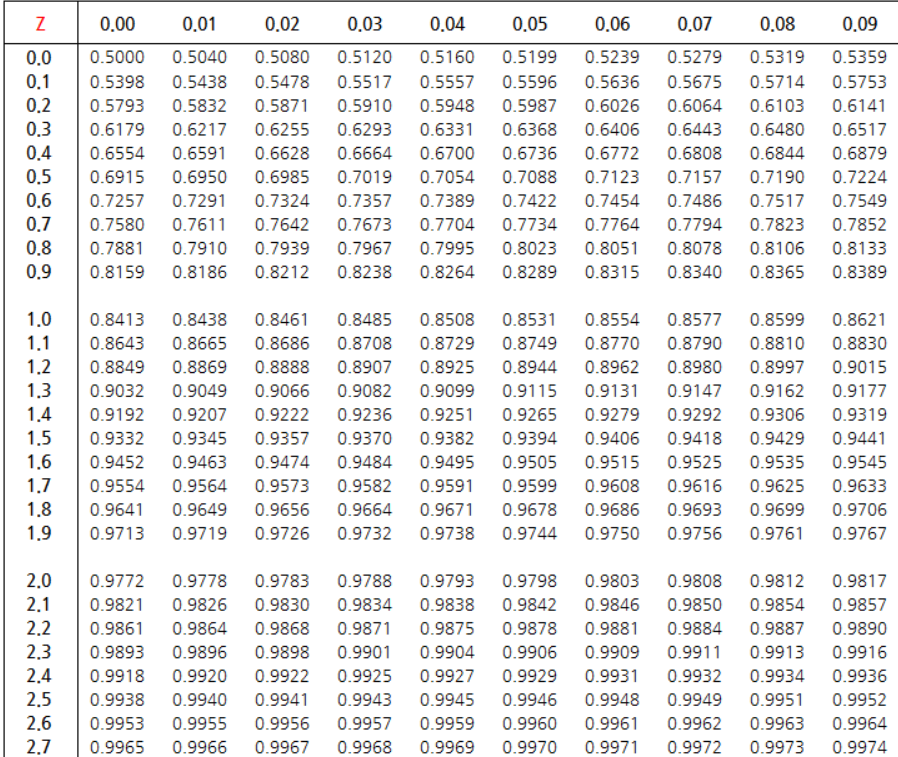

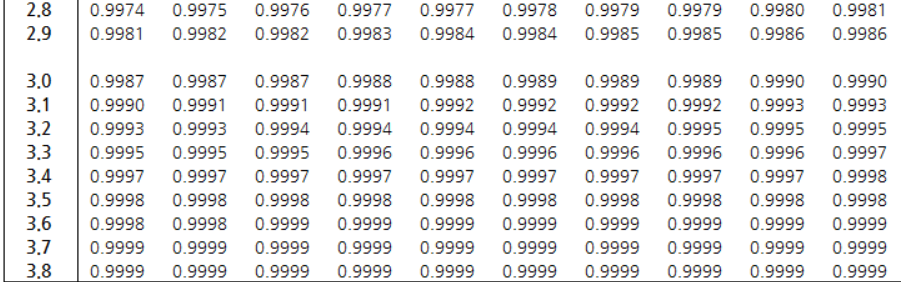

#### 3. X를 평균이 24이고 표준편차가 6인 정규분포를 따르는 확률변수라고 하자. X의 값이 다음과 같을 때의 다음의 값을 구하시오. 
#### A. X가 29와 36사이일 확률<br><br>

In [20]:
from scipy.stats import norm

mu = 24     # 평균
sigma = 6   # 표준편차

            # 29와 36사이의 확률 계산
p = norm.cdf(36, mu, sigma) - norm.cdf(29, mu, sigma)

print(f"X의 값이 29와 36사이일 확률: {p:.4f}")


X의 값이 29와 36사이일 확률: 0.1796


In [1]:
# ppf cdf 구분

# x~n(24, 6^2)
from scipy.stats import norm

# p(29<x<36) = p(x<36) - p(x<=29)
norm.cdf(36,24,6) - 29 24 6

SyntaxError: invalid syntax (2397786140.py, line 7)

#### B. X가 22 이하일 확률<br><br>

In [7]:
from scipy.stats import norm

p = norm.cdf(22, loc=24, scale=6)
print(p)


0.36944134018176367


In [17]:
norm.cdf(22, 24, 6)


0.36944134018176367

#### C. X가 33 초과일 확률<br><br>

In [18]:
# P(X > 33) = 1 - P(X ≤ 33)
# = 1 - F(33)

# Z = (X - μ) / σ
# = (33 - 24) / 6
# = 1.5

from scipy.stats import norm

# X의 평균과 표준편차
mu = 24
sigma = 6

# X가 33 초과일 확률
p = norm.cdf(33, mu, sigma)
print(p)

0.9331927987311419


In [16]:
norm.cdf(33, 24, 6)

0.9331927987311419

#### D. P(X<a)=0.95가 되는 a 값 

In [14]:
# 이해가 잘 안가서 수업시간에 참고 하겠습니다.

from scipy.stats import norm
norm.ppf(0.95, 24, 6)

33.86912176170883

#### 3. TV로 방송되는 프로미식축구의 평균 작전타임 시간은 정규분포로서 평균이 84초이고 표준편차는 10초이다. 어떤 방송국이 90초의 광고시간을 갖고 있다면, 광고가 끝나기 전에 경기가 다시 시작될 확률은? 

In [9]:
# X ~ N(84, 10^2)
# Z = (X-μ)/σ = (90-84)/10 = 0.6
# P(X < 90) = P(Z < 0.6)

from scipy.stats import norm

mu = 84
sigma = 10
x = 90

p = norm.cdf(x, mu, sigma)

print(f"광고가 끝나기 전에 경기가 다시 시작될 확률: {p:.4f}")


광고가 끝나기 전에 경기가 다시 시작될 확률: 0.7257


#### 4. 콜로라도에서 잡히는 송어의 길이는 정규분포를 따르고 평균이 12.5인치이고 표준편차는 1.2인치이다. 송어의 개체 보존을 위해 특정 크기 이하의 송어는 방생하도록 해당 지자체는 규정을 마련하고 있다. 잡히는 송어의 80%의 포획을 허용하고 나머지는 다시 방류하게 하려면, 담당 부서에서 허용하는 최소 송어의 길이는?

In [15]:
import scipy.stats as st

mu = 12.5  # 평균
sigma = 1.2  # 표준편차
p = 0.2  # 포획 허용 확률

# 허용하는 최소 송어의 길이
x = st.norm.ppf(p, loc=mu, scale=sigma)
print('최소 송어의 길이:', round(x, 2), '인치')

최소 송어의 길이: 11.49 인치
